In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

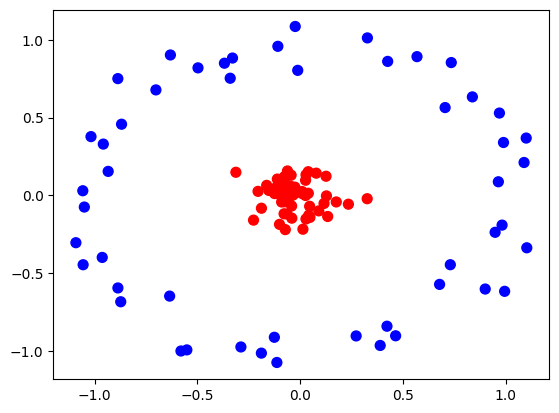

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\hassa\AppData\Local\Temp\ipykernel_14152\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


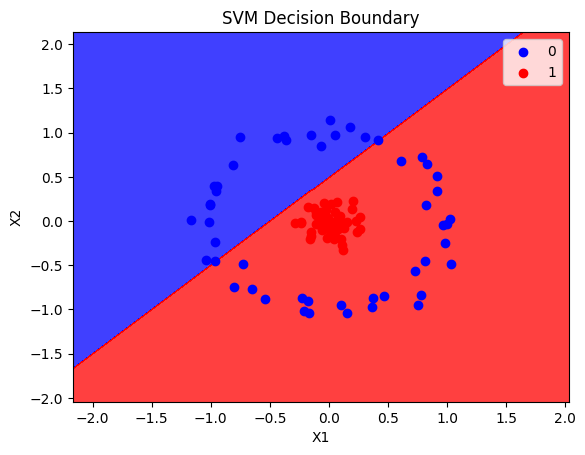

In [9]:
plot_decision_boundary(X, y, classifier)

In [7]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

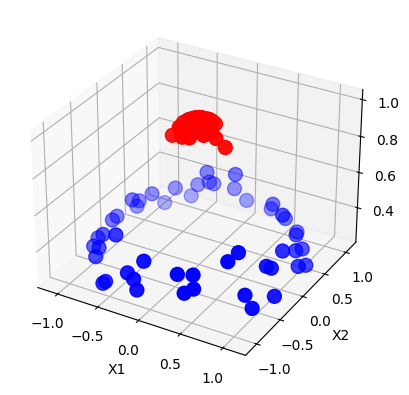

In [8]:
plot_3d_plot(X,y)

In [9]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\hassa\AppData\Local\Temp\ipykernel_11636\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


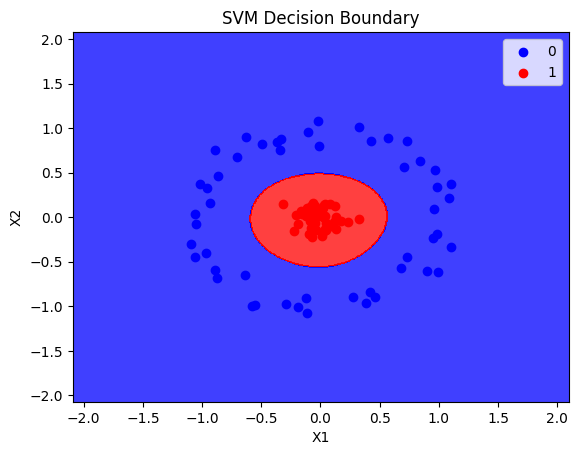

In [11]:
plot_decision_boundary(X, y, rbf_classifier)

In [12]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\hassa\AppData\Local\Temp\ipykernel_11636\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


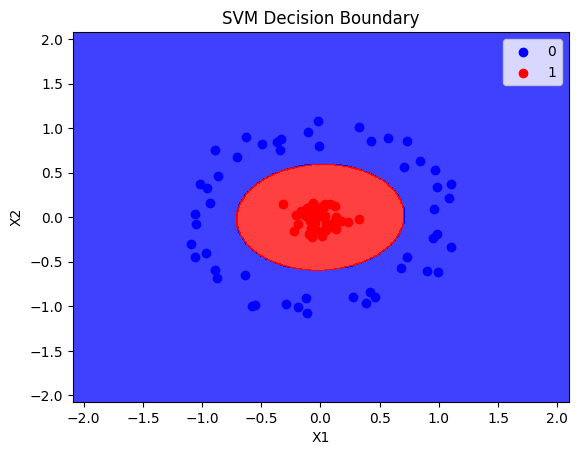

In [14]:
plot_decision_boundary(X, y, poly_classifier)

In [15]:
X

array([[ 3.88614053e-01, -9.62543958e-01],
       [ 9.47541880e-01, -2.36272134e-01],
       [-2.05390954e-01,  2.65835967e-02],
       [ 1.09874637e+00,  3.68534453e-01],
       [ 2.78949118e-02,  1.32801102e-01],
       [-1.13798385e-01, -1.07182508e+00],
       [ 7.29639044e-01, -4.44381224e-01],
       [ 9.93829431e-01, -6.15116120e-01],
       [-5.80267025e-01, -9.98147091e-01],
       [-5.51607729e-01, -9.91103212e-01],
       [-1.09119828e+00, -3.03051153e-01],
       [ 1.25268314e-01,  1.23498796e-01],
       [ 2.57028262e-02, -3.77878038e-05],
       [-5.64323001e-02, -2.34770877e-02],
       [ 4.70599832e-02, -1.40505126e-01],
       [-4.21214822e-02, -6.73594521e-02],
       [-9.70822536e-02,  3.49935560e-03],
       [-1.01773981e+00,  3.77837136e-01],
       [-7.63593594e-02, -4.07955697e-02],
       [ 4.21606698e-01, -8.39084393e-01],
       [-3.29633311e-01,  8.82214795e-01],
       [ 4.25049309e-01,  8.60619189e-01],
       [-2.45626192e-02,  1.08476309e+00],
       [ 3.

In [16]:
np.exp(-(X**2)).sum(1)

array([1.25577043, 1.35315566, 1.95798554, 1.17202218, 1.98174065,
       1.30414753, 1.40801072, 1.05741193, 1.08336003, 1.11211515,
       1.21625532, 1.9692941 , 1.99933958, 1.99626944, 1.97823971,
       1.99370034, 1.99060707, 1.22190566, 1.99252332, 1.3317218 ,
       1.35622166, 1.3115099 , 1.30768791, 1.99827571, 1.97166677,
       1.32693403, 1.19055761, 1.97588359, 1.29634678, 1.99111663,
       1.38808342, 1.98392939, 1.34623161, 1.52444731, 1.954047  ,
       1.32584791, 1.92487305, 1.38772317, 1.9938587 , 1.99006404,
       1.9992818 , 1.98226245, 1.30861627, 1.26730065, 1.9822093 ,
       1.98175072, 1.996427  , 1.35398744, 1.98431079, 1.0248493 ,
       1.97735868, 1.98009698, 1.97370941, 1.25850525, 1.99878791,
       1.14271444, 1.42105656, 1.97547444, 1.99313068, 1.24931429,
       1.35912336, 1.26209141, 1.95828315, 1.95610618, 1.98413353,
       1.88460795, 1.14727772, 1.94357376, 1.976561  , 1.98982555,
       1.32406828, 1.99729994, 1.98184797, 1.11438483, 1.97956

In [17]:
X_new=np.exp(-(X**2))

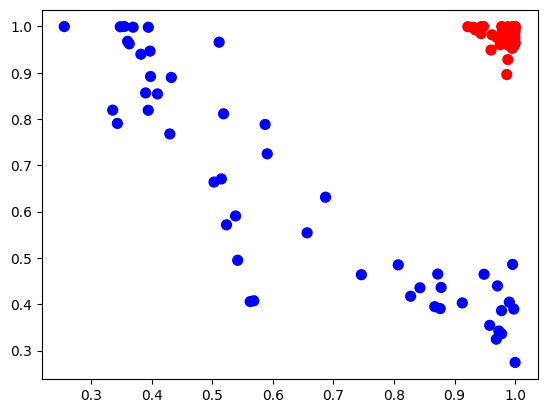

In [21]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')